In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [50]:
df = pd.read_csv('data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


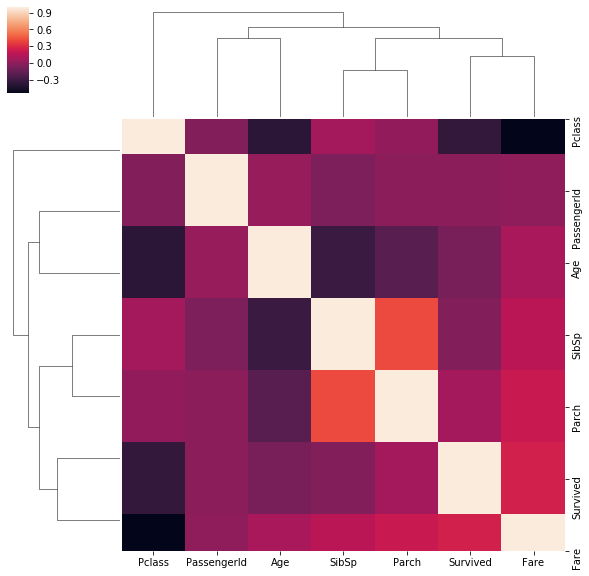

In [18]:
sns.clustermap(df.corr())

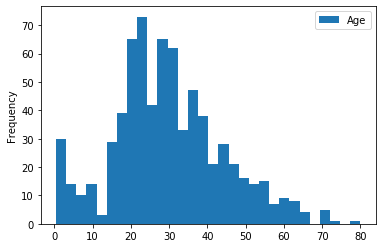

In [101]:
df.plot(kind = 'hist', y = 'Age', bins = 30)

In [32]:
df[['Age','Fare']].sort_values(by = 'Fare', ascending = False)

,Age,Fare
258,35.0,512.3292
737,35.0,512.3292
679,36.0,512.3292
88,23.0,263.0000
27,19.0,263.0000
...,...,...
633,NaN,0.0000
413,NaN,0.0000
822,38.0,0.0000
732,NaN,0.0000


In [34]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [57]:
sample = df[['Survived', 'Pclass']]
sample

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [65]:
sample.loc[sample['Pclass'] == 1, 'Survived'].describe()

count    216.000000
mean       0.629630
std        0.484026
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [67]:
sample.loc[sample['Pclass'] == 2, 'Survived'].describe()

count    184.000000
mean       0.472826
std        0.500623
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [66]:
sample.loc[sample['Pclass'] == 3, 'Survived'].describe()

count    491.000000
mean       0.242363
std        0.428949
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64

In [70]:
age = df[['Age', 'Survived']]
age

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


In [76]:
age.corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


In [94]:
sex = df[['Sex', 'Survived']]
sex['sex2num'] = 0
sex

C:\Users\jinunoh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,Survived,sex2num
0,male,0,0
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,0
...,...,...,...
886,male,0,0
887,female,1,0
888,female,0,0
889,male,1,0


In [95]:
con = sex['Sex'] == 'male'
sex.loc[con, 'sex2num'] = 1

In [97]:
sex.corr()

,Survived,sex2num
Survived,1.000000,-0.543351
sex2num,-0.543351,1.000000
